In [1]:
import matplotlib.pyplot as plt
from matplotlib import interactive
from mpl_toolkits import mplot3d
import numpy as np
from numpy import sin, cos, tan, pi, dot, arccos, log, e, cosh, sinh, sqrt
%matplotlib inline

In [2]:
d = 3.
y = 0.
dy = 0.0001
def f(y):
    return y/3
def F(y):
    return sqrt(1+((f(y+dy)-f(y))/dy)**2)
def volume(f=f,y_max=2.):
    inte = 0.
    i=0.
    while(i<y_max):
        inte += (f(i)+d)*f(i)*dy
        i+=dy
    return d**2*y_max+4*inte
def sA(f=f,y_max=2.):
    inte = 0
    i=0.
    while(i<y_max):
        inte += (2*f(i)+d)*F(i)*dy
        i+=dy
    return d**2+(2*f(y_max)+d)**2+4*inte
def StoV(f=f,y_max=2.):
    return sA(f,y_max)/volume(f,y_max)
print(round(sA(),2))
print(round(volume(),2))
print(round(StoV(),2))
l=1
while(l<5):
    print(round(StoV(y_max=l*2*2.),2))
    l+=1

58.7
27.19
2.16
1.47
0.98
0.74
0.6


In [3]:
#constant
a = 3.0
b = 3.0
c = a
d = b

alpha = pi/180*90
delta = abs(alpha - pi)
beta = delta
gamma = alpha

theta = alpha
phi = delta

In [4]:
def A(y):
    return cosh(y)-0.2*sinh(y)
def B(y):
    return cosh(y)-0.2*sinh(y)
def C(y):
    return cosh(y)-0.2*sinh(y)
def D(y):
    return cosh(y)-0.2*sinh(y)

def lAx(y):
    return -(A(y)*np.tan(alpha)**(-1)+B(y)*np.sin(alpha)**(-1))
def rAx(y):
    return a+D(y)*np.sin(delta)**(-1)+A(y)*np.tan(delta)**(-1)
def AT(x,z):
    rM = [[-1,0],[0,-1]]
    tM = 0
    mul = np.vstack((x,z))
    ans = dot(rM,mul)+tM
    return ans

def lBx(y):
    return -(B(y)*np.tan(beta)**(-1)+C(y)*np.sin(beta)**(-1))
def rBx(y):
    return b+A(y)*np.sin(alpha)**(-1)+B(y)*np.tan(alpha)**(-1)
def BT(x,z):
    rM = [[cos(alpha),sin(alpha)],[-sin(alpha),cos(alpha)]]
    tM = [[-b*cos(alpha)],[b*sin(alpha)]]
    mul = np.vstack((x,z))
    ans = dot(rM,mul)+tM
    return ans

def lCx(y):
    return -(C(y)*np.tan(gamma)**(-1)+D(y)*np.sin(gamma)**(-1))
def rCx(y):
    return c+C(y)*np.tan(beta)**(-1)+B(y)*np.sin(beta)**(-1)
def CT(x,z):
    rM = dot([[cos(alpha+beta),sin(alpha+beta)],[-sin(alpha+beta),cos(alpha+beta)]],[[-1,0],[0,-1]])
    tM = [[d*cos(delta)-a],[d*sin(delta)]]
    mul = np.vstack((x,z))
    ans = dot(rM,mul)+tM
    return ans

def lDx(y):
    return -(D(y)*np.tan(delta)**(-1)+A(y)*np.sin(delta)**(-1))
def rDx(y):
    return d+D(y)*np.tan(gamma)**(-1)+C(y)*np.sin(gamma)**(-1)
def DT(x,z):
    rM = [[cos(delta),-sin(delta)],[sin(delta),cos(delta)]]
    tM = [[-a],[0]]
    mul = np.vstack((x,z))
    ans = dot(rM,mul)+tM
    return ans

In [5]:
y_set = np.linspace(0.0, 10.0, 500)

def prep(S,lSx,rSx,ST):
    y = y_set[0]
    x_S = np.linspace(lSx(y),rSx(y),50)
    XS, YS = np.meshgrid(x_S, y)
    ZS = S(YS)
    XS,ZS = ST(XS,ZS)
    for i in range(0,y_set.size):
        y = y_set[i]
        x_S = np.linspace(lSx(y),rSx(y),50)
        X_S, Y_S = np.meshgrid(x_S, y_set[i])
        X_S,Z_S = ST(X_S,S(Y_S))
        XS = np.vstack((XS,X_S))
        YS = np.vstack((YS,Y_S))
        ZS = np.vstack((ZS,Z_S))
    return XS, YS, ZS
    
XA, YA, ZA = prep(A,lAx,rAx,AT)
XB, YB, ZB = prep(B,lBx,rBx,BT)
XC, YC, ZC = prep(C,lCx,rCx,CT)
XD, YD, ZD = prep(D,lDx,rDx,DT)

In [6]:
#cover
XX = np.linspace(XD[50][0], XB[50][0], 50)
zZ = np.linspace(ZD[50][0], ZD[50][49], 50)
ZZ = zZ[0]
for i in range(1,50):
    Xx = np.linspace(XD[50][i], XB[50][49-i], 50)
    Zz = zZ[i]
    XX = np.vstack((XX,Xx))
    ZZ = np.vstack((ZZ,Zz))
YY = XX*0+2.0
#front cover
xx = np.linspace(XD[0][0], XB[0][0], 50)
zZ = np.linspace(ZD[0][0], ZD[0][49], 50)
zz = zZ[0]
for i in range(1,50):
    Xx = np.linspace(XD[0][i], XB[0][49-i], 50)
    Zz = zZ[i]
    xx = np.vstack((xx,Xx))
    zz = np.vstack((zz,Zz))
yy = xx*0+0.0

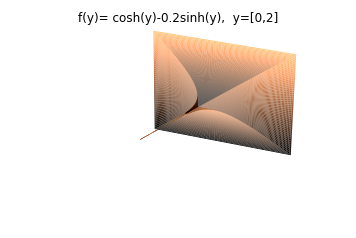

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.axis('off')
ax.set_title('f(y)= cosh(y)-0.2sinh(y),  y=[0,2]')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot_surface(XA, YA, ZA, rstride=1, cstride=1,
               cmap='copper', edgecolor='none')
ax.plot_surface(XB, YB, ZB, rstride=1, cstride=1,
               cmap='copper', edgecolor='none')
ax.plot_surface(XC, YC, ZC, rstride=1, cstride=1,
               cmap='copper', edgecolor='none')
ax.plot_surface(XD, YD, ZD, rstride=1, cstride=1,
               cmap='copper', edgecolor='none')
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1,
               cmap='copper', edgecolor='none')
ax.plot_surface(xx, yy, zz, rstride=1, cstride=1,
               cmap='copper', edgecolor='none')